In [1]:
!sudo apt install graphviz libgraphviz-dev libcgraph6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
libcgraph6 is already the newest version (2.40.1-2).
libcgraph6 set to manually installed.
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 1s (174 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/De

In [2]:
!pip install spektral

     |████████████████████████████████| 102kB 2.6MB/s 


In [3]:
!git clone https://github.com/danielegrattarola/spektral.git

Cloning into 'spektral'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 4033 (delta 169), reused 206 (delta 111), pack-reused 3744
Receiving objects: 100% (4033/4033), 10.96 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (2514/2514), done.


In [4]:
cd spektral

/content/spektral


In [5]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating spektral.egg-info
writing spektral.egg-info/PKG-INFO
writing dependency_links to spektral.egg-info/dependency_links.txt
writing requirements to spektral.egg-info/requires.txt
writing top-level names to spektral.egg-info/top_level.txt
writing manifest file 'spektral.egg-info/SOURCES.txt'
writing manifest file 'spektral.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tests
copying tests/test_datasets.py -> build/lib/tests
copying tests/__init__.py -> build/lib/tests
copying tests/test_utils.py -> build/lib/tests
creating build/lib/spektral
copying spektral/__init__.py -> build/lib/spektral
copying spektral/chem.py -> build/lib/spektral
creating build/lib/tests/test_layers
copying tests/test_layers/test_convolutional.py -> build/lib/tests/test_layers
copying tests/test_layers/test_ops.py -> build/lib/tests/test_

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ferguson_features_user_imp_added.csv')

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/features_user_imp_added_german.csv')

In [8]:
df[df.target_variables == 0].count()['target_variables']

3792

In [9]:
df[df.target_variables == 1].count()['target_variables']

7001

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [11]:
df.head()

,Unnamed: 0,abandon,abid,abil,abl,abov,absolut,absurd,abus,acab,academi,accept,access,accomplic,accomplish,accord,account,acct,accur,accus,acknowledg,aclu,across,act,action,activ,activist,actor,actual,ad,address,administr,admir,admiss,admit,adult,advanc,advantag,advertis,advic,...,worthless,would,wouldnt,wound,wrap,wreck,wrestl,write,written,wrong,wrongdo,wrote,wtf,yall,yard,yawn,yeah,year,yell,yellow,yesterday,yike,york,yorker,youll,young,younger,yourselv,youth,youtub,zero,zimmerman,zionist,zone,user_id,favorites_count,verified,followers_count,user_imp,target_variables
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.539100e+09,413.0,1.0,59.0,0.0016,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.409095e+07,1283.0,1.0,100400.0,0.2410,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.921518e+09,151.0,1.0,384.0,0.0006,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.281204e+08,2218.0,1.0,1685.0,0.0019,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.607852e+06,2426.0,1.0,3475.0,0.0015,0


In [0]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
df.shape

(10793, 2795)

In [14]:
df.target_variables.nunique()

2

In [0]:
X = df.iloc[:, :-1].values #Take all the columns except last one
y = df.iloc[:, -1].values #Take the last column as the result
from scipy import sparse
#X_csr = sparse.csr_matrix(X)

In [16]:
y.shape

(10793,)

In [0]:
import networkx as nx

In [18]:
G = nx.read_multiline_adjlist("/content/drive/My Drive/ferguson.adjlist")
A = nx.adjacency_matrix(G)
A.shape

(10793, 10793)

In [0]:
n1 = df['target_variables']
classes = 2
y = np.zeros((len(df),classes))
#labels
n = list(n1)
for i in range(len(df)):
    if (n[i] == 1):
        y[i,1] = 1
    elif (n[i] == 0):
        y[i,0] = 1



In [0]:
N = A.shape[0]
F = X.shape[-1]
n_classes = y.shape[-1]

In [21]:
type(X)

numpy.ndarray

In [22]:
y.shape

(10793, 2)

In [0]:
from spektral.layers import GraphConv
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
#import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [0]:
y1 = df['target_variables']

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from tensorflow.keras import regularizers

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from spektral.datasets import citation
from spektral.layers import GraphConv

In [0]:
# Parameters
channels = 32           # Number of channels in the first layer
#N = X.shape[0]          # Number of nodes in the graph
#F = X.shape[1]          # Original size of node features
#n_classes = y.shape[1]  # Number of classes
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4 / 2       # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 300            # Number of training epochs
es_patience = 10        # Patience for early stopping


In [29]:
# Preprocessing operations
fltr = GraphConv.preprocess(A).astype('f4')
#X = X.toarray()
# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)


dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GraphConv(channels,
                        activation='relu',
                        kernel_regularizer=l2(l2_reg),
                        use_bias=False)([dropout_1, fltr_in])
dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GraphConv(n_classes,
                        activation='sigmoid',
                        use_bias=False)([dropout_2, fltr_in])

# Build model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              weighted_metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2794)]       0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2794)         0           input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10793)]      0                                            
__________________________________________________________________________________________________
graph_conv (GraphConv)          (None, 32)           89408       dropout[0][0]                    
                                                                 input_2[0][0]                

k :  0
done scaling
train mask processing: 
test mask processing: 
val mask processing: 
graph conv1
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.5944 - acc: 0.5330 - val_loss: 0.0349 - val_acc: 0.6433
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0.5455 - acc: 0.6533 - val_loss: 0.0366 - val_acc: 0.6500
Epoch 3/300
1/1 [==============================] - 1s 1s/step - loss: 0.5116 - acc: 0.7095 - val_loss: 0.0389 - val_acc: 0.6633
Epoch 4/300
1/1 [==============================] - 1s 1s/step - loss: 0.4924 - acc: 0.7381 - val_loss: 0.0414 - val_acc: 0.6667
Epoch 5/300
1/1 [==============================] - 1s 1s/step - loss: 0.4859 - acc: 0.7415 - val_loss: 0.0441 - val_acc: 0.6733
Epoch 6/300
1/1 [==============================] - 1s 1s/step - loss: 0.4835 - acc: 0.7516 - val_loss: 0.0466 - val_acc: 0.6700
Epoch 7/300
1/1 [==============================] - 1s 1s/step - loss: 0.4695 - acc: 0.7613 - val_loss: 0.0489 - val_acc: 0.6700
Epo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


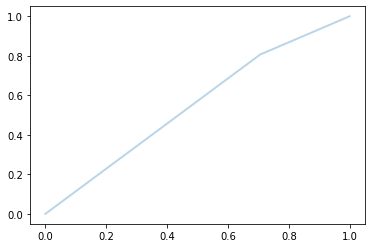

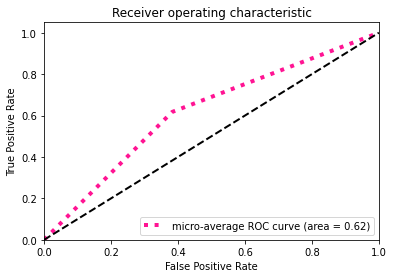

[[ 234  562]
 [ 264 1099]]
True Positive:  [ 234 1099]
False Positive:  [264 562]
False Negative [562 264]
True negative:  [1099, 234]
Accuracy:  [0.61741547 0.61741547]
precision:  [0.46987952 0.66164961]
recall:  [0.29396985 0.80630961]
F1 measure:  [0.36166924 0.72685185]
[[ 234  562]
 [ 264 1099]]
Precision binary: 0.662
Precision micro: 0.617
Precision macro: 0.566
Recall binary: 0.806
Recall micro: 0.617
Recall macro: 0.550
F-Measure: 0.727
True Positive:  [ 234 1099]
False Positive:  [264 562]
False Negative [562 264]
True negative:  [1099, 234]
Accuracy:  [0.61741547 0.61741547]
precision:  [0.46987952 0.66164961]
recall:  [0.29396985 0.80630961]
F1 measure:  [0.36166924 0.72685185]
k :  1
done scaling
train mask processing: 
test mask processing: 
val mask processing: 
graph conv1
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.5517 - acc: 0.6471 - val_loss: 813021312.0000 - val_acc: 0.7100
Epoch 2/300
1/1 [==============================] - 1s 1s/step -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


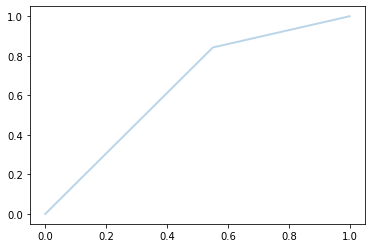

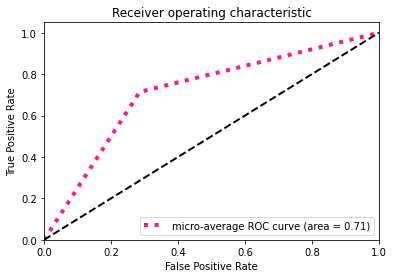

[[ 316  387]
 [ 230 1226]]
True Positive:  [ 316 1226]
False Positive:  [230 387]
False Negative [387 230]
True negative:  [1226, 316]
Accuracy:  [0.71421955 0.71421955]
precision:  [0.57875458 0.7600744 ]
recall:  [0.44950213 0.84203297]
F1 measure:  [0.5060048  0.79895732]
[[ 316  387]
 [ 230 1226]]
Precision binary: 0.760
Precision micro: 0.714
Precision macro: 0.669
Recall binary: 0.842
Recall micro: 0.714
Recall macro: 0.646
F-Measure: 0.799
True Positive:  [ 316 1226]
False Positive:  [230 387]
False Negative [387 230]
True negative:  [1226, 316]
Accuracy:  [0.71421955 0.71421955]
precision:  [0.57875458 0.7600744 ]
recall:  [0.44950213 0.84203297]
F1 measure:  [0.5060048  0.79895732]
k :  2
done scaling
train mask processing: 
test mask processing: 
val mask processing: 
graph conv1
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.5050 - acc: 0.7152 - val_loss: 0.0318 - val_acc: 0.7133
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


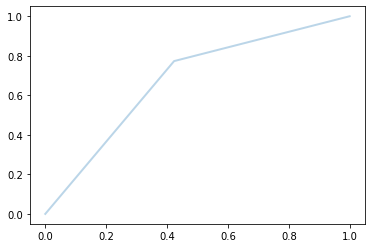

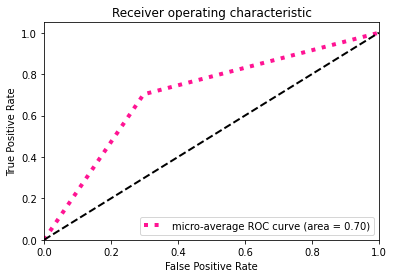

[[ 447  328]
 [ 314 1070]]
True Positive:  [ 447 1070]
False Positive:  [314 328]
False Negative [328 314]
True negative:  [1070, 447]
Accuracy:  [0.70264011 0.70264011]
precision:  [0.58738502 0.76537911]
recall:  [0.57677419 0.77312139]
F1 measure:  [0.58203125 0.76923077]
[[ 447  328]
 [ 314 1070]]
Precision binary: 0.765
Precision micro: 0.703
Precision macro: 0.676
Recall binary: 0.773
Recall micro: 0.703
Recall macro: 0.675
F-Measure: 0.769
True Positive:  [ 447 1070]
False Positive:  [314 328]
False Negative [328 314]
True negative:  [1070, 447]
Accuracy:  [0.70264011 0.70264011]
precision:  [0.58738502 0.76537911]
recall:  [0.57677419 0.77312139]
F1 measure:  [0.58203125 0.76923077]
k :  3
done scaling
train mask processing: 
test mask processing: 
val mask processing: 
graph conv1
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4702 - acc: 0.7448 - val_loss: 0.0314 - val_acc: 0.7200
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


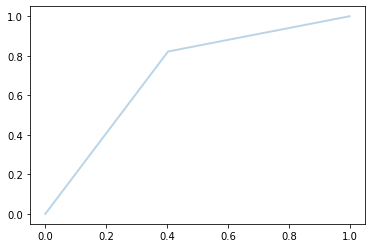

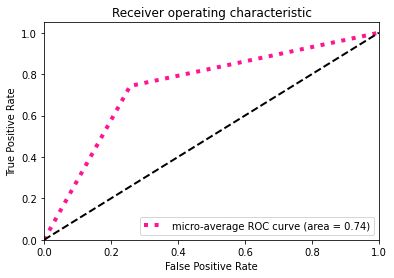

[[ 451  305]
 [ 250 1152]]
True Positive:  [ 451 1152]
False Positive:  [250 305]
False Negative [305 250]
True negative:  [1152, 451]
Accuracy:  [0.74281742 0.74281742]
precision:  [0.64336662 0.79066575]
recall:  [0.59656085 0.82168331]
F1 measure:  [0.6190803  0.80587618]
[[ 451  305]
 [ 250 1152]]
Precision binary: 0.791
Precision micro: 0.743
Precision macro: 0.717
Recall binary: 0.822
Recall micro: 0.743
Recall macro: 0.709
F-Measure: 0.806
True Positive:  [ 451 1152]
False Positive:  [250 305]
False Negative [305 250]
True negative:  [1152, 451]
Accuracy:  [0.74281742 0.74281742]
precision:  [0.64336662 0.79066575]
recall:  [0.59656085 0.82168331]
F1 measure:  [0.6190803  0.80587618]
k :  4
done scaling
train mask processing: 
test mask processing: 
val mask processing: 
graph conv1
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4544 - acc: 0.7556 - val_loss: 0.0297 - val_acc: 0.7267
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


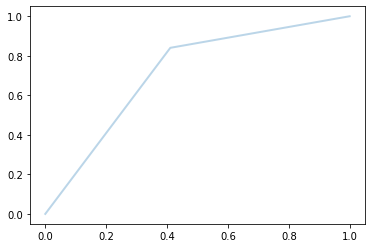

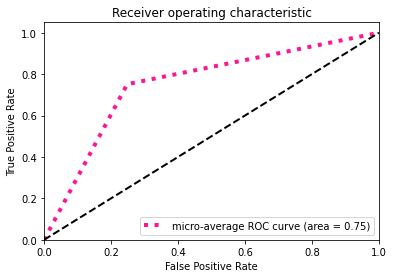

[[ 449  313]
 [ 223 1173]]
True Positive:  [ 449 1173]
False Positive:  [223 313]
False Negative [313 223]
True negative:  [1173, 449]
Accuracy:  [0.75162187 0.75162187]
precision:  [0.66815476 0.78936743]
recall:  [0.58923885 0.84025788]
F1 measure:  [0.62622036 0.81401804]
[[ 449  313]
 [ 223 1173]]
Precision binary: 0.789
Precision micro: 0.752
Precision macro: 0.729
Recall binary: 0.840
Recall micro: 0.752
Recall macro: 0.715
F-Measure: 0.814
True Positive:  [ 449 1173]
False Positive:  [223 313]
False Negative [313 223]
True negative:  [1173, 449]
Accuracy:  [0.75162187 0.75162187]
precision:  [0.66815476 0.78936743]
recall:  [0.58923885 0.84025788]
F1 measure:  [0.62622036 0.81401804]


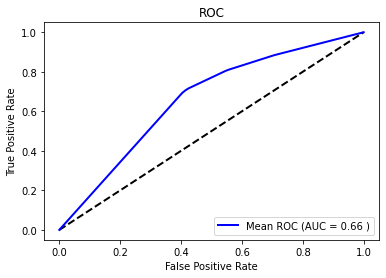

In [30]:
# define 5-fold cross validation test harness

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
tp = []
tn = []
fp = []
fn = []

metrics_acc = []
metrics_precision = []
metrics_recall = []
metrics_f1 = []
pmacro = []
pmicro = []
pbinary = []
rmacro = []
rmicro = []
rbi = []
a = []
f = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for k, (train, test) in enumerate(kfold.split(X, y1)):
  
    #plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
    #regularizer_histories = {}
    print("k : ", k)
  #standardize
    sc_X = StandardScaler() 
    X[train] = sc_X.fit_transform(X[train]) 
    X[test] = sc_X.transform(X[test])
    #X_csr = sparse.csr_matrix(X)
    print("done scaling")
    
    l = []
    for i in range(0, len(df)):
        l.append(False)
    #train indices
    train_indices = list(train)    
    for i in train_indices:
        l[i] = True

    print("train mask processing: ")
    train_mask = np.array(l)

    l = []
    for i in range(0, len(df)):
      l.append(False)
     #test indices           
    test_indices = list(test)  
    for i in test_indices:
      l[i] = True
    print("test mask processing: ")
    test_mask = np.array(l)
    
    #validation indices (taken at random)
    val = np.random.choice(2906, 300, replace = False)            
    val_indices = list(val)    
    l = []
    for i in range(0, len(df)):
      l.append(False)
    for i in val_indices:
      l[i] = True
    val_mask = np.array(l)
    print("val mask processing: ")
   

    # Model definition
    #X_in = Input(shape=(F, ))  # Input layer for X
    #A_in = Input((N, ), sparse=True)  # Input layer for A

    #graph_conv_1 = GraphConv(32, activation='relu')([X_in, A_in])
    print("graph conv1")
    #dropout = Dropout(0.5)(graph_conv_1)
    #graph_conv_2 = GraphConv(n_classes, activation='sigmoid', 
     #                        kernel_regularizer=regularizers.l2(0.5))([dropout, A_in])

    # Build model
    #model = Model(inputs=[X_in, A_in], outputs=graph_conv_2)
    #from spektral import utils
    #A = utils.localpooling_filter(A)
    #model.compile(optimizer='adam',
     #             loss='binary_crossentropy',
      #            weighted_metrics=['acc'])
    # Train model
    validation_data = ([X, fltr], y, val_mask)
    history = model.fit([X, fltr],
              y,
              sample_weight=train_mask,
              epochs=epochs,
              batch_size=N,
              validation_data=validation_data,
              shuffle=False,
              callbacks=[
              EarlyStopping(patience=es_patience,  restore_best_weights=True)
          ])  # Shuffling data means shuffling the whole graph

    # Evaluate model
    eval_results = model.evaluate([X, fltr],
                                  y,
                                  sample_weight=test_mask,
                                  batch_size=N)
    print('Done.\n'
          'Test loss: {}\n'
          'Test accuracy: {}'.format(*eval_results))
    
    import scipy
    A1 = scipy.sparse.csr_matrix.todense(fltr)
    A1 = pd.DataFrame(A1)
    A1 = A1.loc[test_indices,test_indices]
    A2 = sparse.csr_matrix(A1)
    #A2.shape
  
    #google
    y_pred = model.predict(
        [X[test], A2], batch_size=N, verbose=0, steps=None, callbacks=None, max_queue_size=10,
        workers=1, use_multiprocessing=False
    )

    
    
    predict_class = np.argmax(y_pred, axis=1)
    y2 = np.zeros((len(test),classes))
    for i in range(len(test)):
        if (predict_class[i] == 1):
            y2[i,1] = 1
        elif (predict_class[i] == 0):
            y2[i,0] = 1

    
    fpr, tpr, t = roc_curve(y1[test], predict_class)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (k, roc_auc))
      
    '''viz = metrics.plot_roc_curve(history, X[test], y1[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
'''
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[test, i], y2[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y[test].ravel(), y2.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes
    lw = 2
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
  
    #print(predict_class)
    conf_mat = confusion_matrix(y1[test], predict_class)
    
    print(conf_mat)
    
    #Evaluation Measures
    TP = np.diag(conf_mat)
    print("True Positive: ", TP)
    FP = np.sum(conf_mat, axis=0) - TP
    print("False Positive: ", FP)
    FN = np.sum(conf_mat, axis=1) - TP
    print("False Negative", FN)
    num_classes = classes
    TN = []
    for i in range(num_classes):
        temp = np.delete(conf_mat, i, 0)    # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    print("True negative: ", TN)

    acc = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    print("Accuracy: ", acc)

    print("precision: ", precision)
    print("recall: ", recall)
    F1 = 2 * ((precision * recall)/(precision + recall))
    tp.append(TP)
    tn.append(TN)
    fp.append(FP)
    fn.append(FN)
    
    
    metrics_acc.append(acc)
    metrics_precision.append(precision)
    metrics_recall.append(recall)
    metrics_f1.append(F1)
    print ("F1 measure: ", F1)



  
    #print(predict_class)
    conf_mat = confusion_matrix(y1[test], predict_class)
    
    print(conf_mat)
    p = precision_score(y1[test], predict_class, average='binary')
    print('Precision binary: %.3f' % p)
    pbinary.append(p)
    p1 = precision_score(y1[test], predict_class, average='micro')
    print('Precision micro: %.3f' % p1)
    pmicro.append(p1)
    p2 = precision_score(y1[test], predict_class, average='macro')
    print('Precision macro: %.3f' % p2)
    pmacro.append(p2)
    r = recall_score(y1[test], predict_class, average='binary')
    print('Recall binary: %.3f' % r)
    rbi.append(r)
    r1 = recall_score(y1[test], predict_class, average='micro')
    print('Recall micro: %.3f' % r1)
    rmicro.append(r1)
    r2 = recall_score(y1[test], predict_class, average='macro')
    print('Recall macro: %.3f' % r2)
    rmacro.append(r2)
    s = f1_score(y1[test], predict_class, average='binary')
    print('F-Measure: %.3f' % s)
    f.append(s)

    ac = accuracy_score(y1[test], predict_class)
    a.append(ac)
    #Evaluation Measures
    TP = np.diag(conf_mat)
    print("True Positive: ", TP)
    FP = np.sum(conf_mat, axis=0) - TP
    print("False Positive: ", FP)
    FN = np.sum(conf_mat, axis=1) - TP
    print("False Negative", FN)
    num_classes = classes
    TN = []
    for i in range(num_classes):
        temp = np.delete(conf_mat, i, 0)    # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    print("True negative: ", TN)

    acc = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    print("Accuracy: ", acc)

    print("precision: ", precision)
    print("recall: ", recall)
    F1 = 2 * ((precision * recall)/(precision + recall))
    tp.append(TP)
    tn.append(TN)
    fp.append(FP)
    fn.append(FN)
    
    
    metrics_acc.append(acc)
    metrics_precision.append(precision)
    metrics_recall.append(recall)
    metrics_f1.append(F1)
    print ("F1 measure: ", F1)

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
        label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


    

In [31]:
y.shape

(10793, 2)

In [32]:
print("precision macro: ", np.array(pmacro).mean())
print("precision micro: ", np.array(pmicro).mean())
print("precision binary macro: ", np.array(pbinary).mean())
print("accuracy: ", np.array(a).mean())
print("recall macro: ", np.array(rmacro).mean())
print("recall micro: ", np.array(rmicro).mean())
print("recall binary macro: ", np.array(rbi).mean())
print("f1: ", np.array(f).mean())

precision macro:  0.6714676795667207
precision micro:  0.7057428846035799
precision binary macro:  0.7534272596218246
accuracy:  0.7057428846035799
recall macro:  0.6589451022894492
recall micro:  0.7057428846035799
recall binary macro:  0.8166810309364019
f1:  0.7829868319354663


In [0]:
import numpy
numpy.savetxt("/content/drive/My Drive/ferguson_gcn_fpr_mean.csv", mean_fpr, delimiter=",")
numpy.savetxt("/content/drive/My Drive/ferguson_gcn_tpr_mean.csv", mean_tpr, delimiter=",")

df_mean_fpr = pd.DataFrame(mean_fpr)
df_mean_fpr.to_csv('/content/drive/My Drive/ferguson_df_mean_fpr_gcn.csv')
df_mean_tpr = pd.DataFrame(mean_tpr)
df_mean_tpr.to_csv('/content/drive/My Drive/ferguson_df_mean_tpr_gcn.csv')

In [0]:
''' viz = metrics.plot_roc_curve(model, X[test], predict_class,
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    '''
    '''ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


In [0]:
import pickle
with open('/content/drive/My Drive/tp_spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(tp, filehandle)

In [0]:
with open('/content/drive/My Drive/tn_spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(tn, filehandle)

In [0]:

with open('/content/drive/My Drive/fp__spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(fp, filehandle)

In [0]:
with open('/content/drive/My Drive/fn__spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(fn, filehandle)

In [0]:
with open('/content/drive/My Drive/precision__spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(metrics_precision, filehandle)

In [0]:

with open('/content/drive/My Drive/accuracy__spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(metrics_acc, filehandle)

In [0]:
with open('/content/drive/My Drive/F1_measure__spektral_german', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(metrics_f1, filehandle)

In [0]:
with open('/content/drive/My Drive/recall__spektral', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(metrics_recall, filehandle)

In [0]:
with open('tp', 'rb') as filehandle:
    # read the data as binary data stream
    placesList = pickle.load(filehandle)

In [0]:
tp

[array([   0, 2775]),
 array([  23, 2737]),
 array([ 452, 1712]),
 array([   0, 2776]),
 array([   0, 2776])]

In [0]:
#micro-average classwise
micro_precision_group_0 = (tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + tp[4][0])/(tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + 
                           tp[4][0] + fp[0][0] + fp[1][0] + fp[2][0] + fp[3][0] + fp[4][0])

micro_precision_group_1 = (tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + tp[4][1])/(tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + 
                           tp[4][1] + fp[0][1] + fp[1][1] + fp[2][1] + fp[3][1] + fp[4][1])

#micro_precision_group_2 = (tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + tp[4][2])/(tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + 
#                           tp[4][2] + fp[0][2] + fp[1][2] + fp[2][2] + fp[3][2] + fp[4][2])

#micro_precision_group_3 = (tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + tp[4][3])/(tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + 
#                           tp[4][3] + fp[0][3] + fp[1][3] + fp[2][3] + fp[3][3] + fp[4][3])

micro_recall_group_0 = (tp[0][0] + tp[1][0] + tp[2][0] + tp[3][0] + tp[4][0])/(tp[0][0] + tp[1][0] 
                        + tp[2][0] + tp[3][0] + tp[4][0] + fn[0][0] + fn[1][0] + fn[2][0] + fn[3][0] + fn[4][0])

micro_recall_group_1 = (tp[0][1] + tp[1][1] + tp[2][1] + tp[3][1] + tp[4][1])/(tp[0][1] + tp[1][1] 
                        + tp[2][1] + tp[3][1] + tp[4][1] + fn[0][1] + fn[1][1] + fn[2][1] + fn[3][1] + fn[4][1])

#micro_recall_group_2 = (tp[0][2] + tp[1][2] + tp[2][2] + tp[3][2] + tp[4][2])/(tp[0][2] + tp[1][2] 
#                        + tp[2][2] + tp[3][2] + tp[4][2] + fn[0][2] + fn[1][2] + fn[2][2] + fn[3][2] + fn[4][2])

#micro_recall_group_3 = (tp[0][3] + tp[1][3] + tp[2][3] + tp[3][3] + tp[4][3])/(tp[0][3] + tp[1][3] 
#                        + tp[2][3] + tp[3][3] + tp[4][3] + fn[0][3] + fn[1][3] + fn[2][3] + fn[3][3] + fn[4][3])

In [35]:
print(micro_recall_group_0)
print(micro_recall_group_1)
#print(micro_recall_group_2)
#print(micro_recall_group_3)


0.4100185528756957
0.8145827399601253


In [36]:
print(micro_precision_group_0)
print(micro_precision_group_1)
#print(micro_precision_group_2)
#print(micro_precision_group_3)

0.542997542997543
0.7198590485779008


In [0]:
micro_precision = []
micro_precision.append(micro_precision_group_0)
micro_precision.append(micro_precision_group_1)
#micro_precision.append(micro_precision_group_2)
#micro_precision.append(micro_precision_group_3)

micro_recall = []
micro_recall.append(micro_recall_group_0)
micro_recall.append(micro_recall_group_1)
#micro_recall.append(micro_recall_group_2)
#micro_recall.append(micro_recall_group_3)



In [0]:
 mirco_f1_group = []

mirco_f1_group.append(2 * ((micro_precision_group_0 * micro_recall_group_0)/(micro_precision_group_0 
                                                                                 + micro_recall_group_0)))
mirco_f1_group.append(2 * ((micro_precision_group_1 * micro_recall_group_1)/(micro_precision_group_1 
                                                                                 + micro_recall_group_1)))
#mirco_f1_group.append(2 * ((micro_precision_group_2 * micro_recall_group_2)/(micro_precision_group_2 
                                          #                                       + micro_recall_group_2)))
#mirco_f1_group.append(2 * ((micro_precision_group_3 * micro_recall_group_3)/(micro_precision_group_3 
                                           #                                      + micro_recall_group_3)))

#f1_score = 2 * ((micro_precision * micro_recall)/(micro_precision + micro_recall))

In [39]:
print(micro_precision)
print(micro_recall)
print(mirco_f1_group)

[0.542997542997543, 0.7198590485779008]
[0.4100185528756957, 0.8145827399601253]
[0.46723044397463, 0.7642971672902191]


In [0]:
# mean accuracy classwise
mean_accuracy = []
for i in range(0, classes):
    a = []
    for j in range(0, 5): #row
        a.append(metrics_acc[j][i])
        n = np.array(a)
    mean_accuracy.append(n.mean())

In [41]:
mean_accuracy

[0.6731820287169986, 0.6731820287169986]

In [0]:
#macro-average classwise
macro_precision_group_0 = (metrics_precision[0][0] + metrics_precision[1][0] + metrics_precision[2][0] + 
                           metrics_precision[3][0] + metrics_precision[4][0])/5
macro_precision_group_1 = (metrics_precision[0][1] + metrics_precision[1][1] + metrics_precision[2][1] + 
                           metrics_precision[3][1] + metrics_precision[4][1])/5
macro_precision_group_2 = (metrics_precision[0][2] + metrics_precision[1][2] + metrics_precision[2][2] + 
                           metrics_precision[3][2] + metrics_precision[4][2])/5
macro_precision_group_3 = (metrics_precision[0][3] + metrics_precision[1][3] + metrics_precision[2][3] + 
                           metrics_precision[3][3] + metrics_precision[4][3])/5

macro_recall_group_0 = (metrics_recall[0][0] + metrics_recall[1][0] + metrics_recall[2][0] + 
                           metrics_recall[3][0] + metrics_recall[4][0])/5
macro_recall_group_1 = (metrics_recall[0][1] + metrics_recall[1][1] + metrics_recall[2][1] + 
                           metrics_recall[3][1] + metrics_recall[4][1])/5
macro_recall_group_2 = (metrics_recall[0][2] + metrics_recall[1][2] + metrics_recall[2][2] + 
                           metrics_recall[3][2] + metrics_recall[4][2])/5
macro_recall_group_3 = (metrics_recall[0][3] + metrics_recall[1][3] + metrics_recall[2][3] + 
                           metrics_recall[3][3] + metrics_recall[4][3])/5

macro_f1_group_0 = 2 * ((macro_precision_group_0 * macro_recall_group_0)/(macro_precision_group_0 + macro_recall_group_0))

macro_f1_group_1 = 2 * ((macro_precision_group_1 * macro_recall_group_1)/(macro_precision_group_1 + macro_recall_group_1))

macro_f1_group_2 = 2 * ((macro_precision_group_2 * macro_recall_group_2)/(macro_precision_group_2 + macro_recall_group_2))

macro_f1_group_3 = 2 * ((macro_precision_group_3 * macro_recall_group_3)/(macro_precision_group_3 + macro_recall_group_3))

IndexError: ignored

In [0]:
macro_precision = []
macro_precision.append(macro_precision_group_0)
macro_precision.append(macro_precision_group_1)
macro_precision.append(macro_precision_group_2)
macro_precision.append(macro_precision_group_3)

macro_recall = []
macro_recall.append(macro_recall_group_0)
macro_recall.append(macro_recall_group_0)
macro_recall.append(macro_recall_group_0)
macro_recall.append(macro_recall_group_0)

marco_f1_group = []

marco_f1_group.append(2 * ((macro_precision_group_0 * macro_recall_group_0)/(macro_precision_group_0 
                                                                                 + macro_recall_group_0)))
marco_f1_group.append(2 * ((macro_precision_group_1 * macro_recall_group_1)/(macro_precision_group_1 
                                                                                 + macro_recall_group_1)))
marco_f1_group.append(2 * ((macro_precision_group_2 * macro_recall_group_2)/(macro_precision_group_2 
                                                                                 + macro_recall_group_2)))
marco_f1_group.append(2 * ((macro_precision_group_3 * macro_recall_group_3)/(macro_precision_group_3 
                                                                                 + macro_recall_group_3)))

#f1_score = 2 * ((micro_precision * micro_recall)/(micro_precision + micro_recall))

print(macro_precision)
print(macro_recall)
print(marco_f1_group)

[0.3523932173849107, nan, 0.05173160173160174, 0.7304954151861225]
[0.27968968065019295, 0.27968968065019295, 0.27968968065019295, 0.27968968065019295]
[0.31186019030119677, nan, 0.02277112164447515, 0.7714543547210584]


In [0]:
metrics_acc # verify

[array([0.69759358, 0.99171123, 0.95695187, 0.66497326]),
 array([0.68957219, 0.99278075, 0.95748663, 0.65802139]),
 array([0.6828877 , 0.98930481, 0.94786096, 0.65      ]),
 array([0.70454545, 0.99224599, 0.95561497, 0.6684492 ]),
 array([0.67967914, 0.98796791, 0.95614973, 0.64893048])]